### Importing and Understanding Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
car = pd.read_csv('Car_Price_dataset.csv')

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
x = car['CarName'].str.split(expand=True)
car['company'] = x[0]
car.drop('CarName',axis=1,inplace = True)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Data Preparation

In [6]:
# Converting Binary Categorical features into 1 and 0
car['fueltype'] = car['fueltype'].map({'gas' : 1 , 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'turbo' : 1 , 'std' : 0})
car['doornumber'] = car['doornumber'].map({'four' : 1, 'two' : 0})
car['enginelocation'] =  car['enginelocation'].map({'front' : 1, 'rear' : 0})
car['cylindernumber'] = car['cylindernumber'].map({'four' : 4, 'six' : 6, 'five' : 5, 'eight' : 8, 'two' : 2, 'three' : 3, 'twelve': 12})

### Dummy Variable Creation

In [7]:
carbody = pd.get_dummies(car['carbody'],prefix='carbody',drop_first=True)
car = pd.concat([car,carbody],axis=1)

drivewheel = pd.get_dummies(car['drivewheel'],prefix='drivewheel',drop_first=True)
car = pd.concat([car,drivewheel],axis=1)

enginetype = pd.get_dummies(car['enginetype'],prefix='enginetype',drop_first=True)
car = pd.concat([car,enginetype],axis=1)

fuelsystem = pd.get_dummies(car['fuelsystem'],prefix='fuelsystem',drop_first=True)
car = pd.concat([car,fuelsystem],axis=1)

company = pd.get_dummies(car['company'],prefix='company',drop_first=True)
car = pd.concat([car,company],axis=1)

In [8]:
# We have created dummies for the below variables, so we can drop them
car = car.drop(['carbody','drivewheel','enginetype','fuelsystem','company'],axis=1)

In [9]:
car = car.drop(['car_ID'], axis =1)

### Checking for Missing Values

In [10]:
car.isnull().sum()

symboling              0
fueltype               0
aspiration             0
doornumber             0
enginelocation         0
wheelbase              0
carlength              0
carwidth               0
carheight              0
curbweight             0
cylindernumber         0
enginesize             0
boreratio              0
stroke                 0
compressionratio       0
horsepower             0
peakrpm                0
citympg                0
highwaympg             0
price                  0
carbody_hardtop        0
carbody_hatchback      0
carbody_sedan          0
carbody_wagon          0
drivewheel_fwd         0
drivewheel_rwd         0
enginetype_dohcv       0
enginetype_l           0
enginetype_ohc         0
enginetype_ohcf        0
enginetype_ohcv        0
enginetype_rotor       0
fuelsystem_2bbl        0
fuelsystem_4bbl        0
fuelsystem_idi         0
fuelsystem_mfi         0
fuelsystem_mpfi        0
fuelsystem_spdi        0
fuelsystem_spfi        0
company_alfa-romero    0


Now we don't have any missing values

In [11]:
car.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.560976,0.985366,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878,0.014634,0.034146,0.039024,0.039024,0.014634,0.043902,0.063415,0.019512,0.014634,0.009756,0.073171,0.004878,0.063415,0.082927,0.053659,0.034146,0.004878,0.019512,0.009756,0.029268,0.058537,0.15122,0.004878,0.004878,0.043902,0.053659,0.009756
std,1.245307,0.297446,0.385535,0.497483,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843,0.120377,0.182050,0.194127,0.194127,0.120377,0.205380,0.244304,0.138655,0.120377,0.098531,0.261054,0.069843,0.244304,0.276447,0.225894,0.182050,0.069843,0.138655,0.098531,0.168970,0.235330,0.35914,0.069843,0.069843,0.205380,0.225894,0.098531
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
122,1,1,0,1,1,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,7609.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125,3,1,0,0,1,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
166,1,1,0,0,1,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,9538.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3,1,0,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1,1,1,1,1,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
num_vars = ['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','cylindernumber']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\Manish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Manish\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
122,0.6,1,0,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125,1.0,1,0,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
166,0.6,1,0,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,1,0,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,1,1,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
y_train = df_train.pop('price')
X_train = df_train

In [17]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.181818,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.013986,0.076923,0.0,0.062937,0.090909,0.055944,0.027972,0.0,0.020979,0.013986,0.020979,0.076923,0.132867,0.006993,0.0,0.034965,0.041958,0.013986
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.117845,0.267406,0.0,0.243703,0.288490,0.230621,0.165472,0.0,0.143818,0.117845,0.143818,0.267406,0.340624,0.083624,0.0,0.184337,0.201198,0.117845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 37),
 ('fueltype', False, 8),
 ('aspiration', False, 7),
 ('doornumber', False, 43),
 ('enginelocation', True, 1),
 ('wheelbase', False, 20),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 9),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 19),
 ('highwaympg', False, 48),
 ('carbody_hardtop', False, 24),
 ('carbody_hatchback', False, 23),
 ('carbody_sedan', False, 25),
 ('carbody_wagon', False, 26),
 ('drivewheel_fwd', False, 39),
 ('drivewheel_rwd', False, 46),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 27),
 ('enginetype_ohcf', False, 3),
 ('enginetype_ohcv', False, 49),
 ('enginetype_rotor', False, 4),
 ('fuelsystem_2bbl', False, 38),
 ('fuelsystem_4bbl', False, 28),
 ('fuelsystem_idi', False, 10),
 ('fuelsys

In [22]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'enginetype_dohcv', 'enginetype_l',
       'company_bmw', 'company_peugeot', 'company_porsche'],
      dtype='object')

In [23]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_alfa-romero',
       'company_audi', 'company_buick', 'company_chevrolet', 'company_dodge',
       'company_honda', 'company_isuzu', 'company_jaguar', 'company_maxda',
       'company_mazda', 'company_mercury', 'company_mitsubishi',
       'company_nissan', 'company_plymouth', 'company_porcshce',
       'company_renault', 'company_saab', 'company_subaru', 'company_toyota',
       'company_toyouta', 'company_vokswagen', 'company_volkswagen',
       'com

In [24]:
X_train_rfe = X_train[col]

In [26]:
import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)

In [27]:
lm = sm.OLS(y_train,sm.add_constant(X_train_rfe)).fit() 

C:\Users\Manish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.37e-68
Time:                        12:55:28   Log-Likelihood:                 205.77
No. Observations:                 143   AIC:                            -385.5
Df Residuals:                     130   BIC:                            -347.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5219      0.106  

`enginetype_dohcv` is insignificant in presence of other variables; can be dropped

In [29]:
X_train_new = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)

In [31]:
lm = sm.OLS(y_train,sm.add_constant(X_train_new)).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.26e-68
Time:                        12:58:39   Log-Likelihood:                 203.67
No. Observations:                 143   AIC:                            -383.3
Df Residuals:                     131   BIC:                            -347.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3963      0.086     

### VIF analysis

In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,116.86
4,enginesize,111.02
3,cylindernumber,79.80
2,curbweight,49.24
5,boreratio,38.36
1,carwidth,36.27
6,stroke,34.13
9,company_peugeot,10.43
7,enginetype_l,9.69
10,company_porsche,1.88


As the VIF for 'enginelocation' is very high we can drop that feature.

In [34]:
X_train_new2 = X_train_new.drop(["enginelocation"], axis = 1)

In [35]:
lm2 = sm.OLS(y_train,sm.add_constant(X_train_new2)).fit()

In [36]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 11 May 2020   Prob (F-statistic):           3.36e-67
Time:                        13:03:14   Log-Likelihood:                 197.28
No. Observations:                 143   AIC:                            -372.6
Df Residuals:                     132   BIC:                            -340.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1763      0.060     

Let's check the VIF again

In [37]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,46.76
0,carwidth,36.27
3,enginesize,31.35
2,cylindernumber,17.30
8,company_peugeot,10.08
4,boreratio,9.96
6,enginetype_l,9.40
5,stroke,7.38
9,company_porsche,1.24
7,company_bmw,1.15


As the VIF for 'curbweight' is very high we can drop that feature.

In [38]:
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)

In [39]:
lm3 = sm.OLS(y_train,sm.add_constant(X_train_new3)).fit()

In [40]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 11 May 2020   Prob (F-statistic):           9.37e-65
Time:                        13:07:22   Log-Likelihood:                 188.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     133   BIC:                            -327.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2446      0.062     

Let's check the VIF again

In [41]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.58
2,enginesize,16.78
1,cylindernumber,16.06
7,company_peugeot,10.00
3,boreratio,9.72
5,enginetype_l,9.39
4,stroke,7.37
8,company_porsche,1.17
6,company_bmw,1.15


'enginetype_l' seems insignificant . So lets drop this feature.

In [43]:
X_train_new4 = X_train_new3.drop(["enginetype_l"], axis = 1)

In [44]:
lm4 = sm.OLS(y_train,sm.add_constant(X_train_new4)).fit()

In [45]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     162.4
Date:                Mon, 11 May 2020   Prob (F-statistic):           4.50e-65
Time:                        13:10:47   Log-Likelihood:                 186.40
No. Observations:                 143   AIC:                            -354.8
Df Residuals:                     134   BIC:                            -328.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2638      0.061     

Let's check the VIF again

In [46]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.07
2,enginesize,16.70
1,cylindernumber,15.89
3,boreratio,9.66
4,stroke,7.24
6,company_peugeot,1.30
7,company_porsche,1.17
5,company_bmw,1.15


In [47]:
X_train_new5 = X_train_new4.drop(["carwidth"], axis = 1)

In [48]:
lm5 = sm.OLS(y_train,sm.add_constant(X_train_new5)).fit()

In [49]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     93.78
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.08e-48
Time:                        13:12:53   Log-Likelihood:                 143.40
No. Observations:                 143   AIC:                            -270.8
Df Residuals:                     135   BIC:                            -247.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2312      0.083     

Let's check the VIF again

In [50]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,15.55
0,cylindernumber,15.06
2,boreratio,7.23
3,stroke,5.79
5,company_peugeot,1.20
6,company_porsche,1.17
4,company_bmw,1.13


`company_peugeot` is insignificant in presence of other variables; can be dropped

In [51]:
X_train_new6 = X_train_new5.drop(["company_peugeot"], axis = 1)

In [52]:
lm6 = sm.OLS(y_train,sm.add_constant(X_train_new6)).fit()

In [53]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 11 May 2020   Prob (F-statistic):           9.84e-50
Time:                        13:15:20   Log-Likelihood:                 143.40
No. Observations:                 143   AIC:                            -272.8
Df Residuals:                     136   BIC:                            -252.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2313      0.082     

Let's check the VIF again

In [54]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,15.31
0,cylindernumber,14.53
2,boreratio,6.76
3,stroke,5.78
5,company_porsche,1.16
4,company_bmw,1.12


In [55]:
X_train_new7 = X_train_new6.drop(["enginesize"], axis = 1)

In [56]:
lm7 = sm.OLS(y_train,sm.add_constant(X_train_new7)).fit()

In [57]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     75.26
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.40e-37
Time:                        13:18:15   Log-Likelihood:                 111.39
No. Observations:                 143   AIC:                            -210.8
Df Residuals:                     137   BIC:                            -193.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4106      0.047     

Let's check the VIF again

In [58]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,5.69
1,boreratio,5.53
0,cylindernumber,5.39
4,company_porsche,1.16
3,company_bmw,1.11


In [81]:
X_train_new8 = X_train_new6.drop(['company_bmw','company_porsche'], axis = 1)

In [82]:
lm8 = sm.OLS(y_train,sm.add_constant(X_train_new8)).fit()

In [83]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 11 May 2020   Prob (F-statistic):           3.66e-43
Time:                        14:03:52   Log-Likelihood:                 122.34
No. Observations:                 143   AIC:                            -234.7
Df Residuals:                     138   BIC:                            -219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1328      0.090      1.

Let's check the VIF again

In [84]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,15.18
0,cylindernumber,14.40
2,boreratio,6.42
3,stroke,5.31


In [87]:
X_train_new9 = X_train_new6.drop(['cylindernumber'], axis = 1)

In [88]:
lm9 = sm.OLS(y_train,sm.add_constant(X_train_new9)).fit()

In [89]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 11 May 2020   Prob (F-statistic):           4.46e-47
Time:                        14:11:07   Log-Likelihood:                 134.37
No. Observations:                 143   AIC:                            -256.7
Df Residuals:                     137   BIC:                            -239.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0839      0.039     

Let's check the VIF again

In [90]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,6.65
0,enginesize,5.68
2,stroke,4.89
4,company_porsche,1.15
3,company_bmw,1.12


In [91]:
X_train_new10 = X_train_new9.drop(['stroke'], axis = 1)

In [92]:
lm10 = sm.OLS(y_train,sm.add_constant(X_train_new10)).fit()

In [93]:
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     143.7
Date:                Mon, 11 May 2020   Prob (F-statistic):           3.54e-48
Time:                        14:13:17   Log-Likelihood:                 134.35
No. Observations:                 143   AIC:                            -258.7
Df Residuals:                     138   BIC:                            -243.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0785      0.022     

Let's check the VIF again

In [94]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.05
1,boreratio,4.93
2,company_bmw,1.10
3,company_porsche,1.07


#### Model number 11

In [96]:
X_train_new11 = X_train_new10.drop(['boreratio'], axis = 1)

In [97]:
lm11 = sm.OLS(y_train,sm.add_constant(X_train_new11)).fit()

In [98]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 11 May 2020   Prob (F-statistic):           4.29e-49
Time:                        14:14:43   Log-Likelihood:                 133.73
No. Observations:                 143   AIC:                            -259.5
Df Residuals:                     139   BIC:                            -247.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0611      0.015     

Let's check the VIF again

In [99]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.16
1,company_bmw,1.10
2,company_porsche,1.06


#### For the above model all the features are significant and VIF value for every feature is less than 2. Hence this model is stable.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [105]:
y_train_price = lm11.predict(sm.add_constant(X_train_new11))

C:\Users\Manish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'Errors')

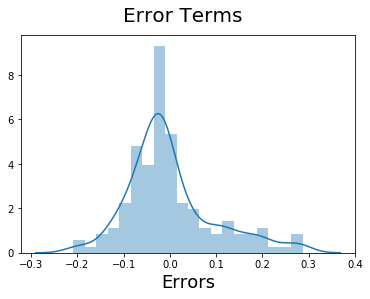

In [106]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions

#### Applying the scaling on the test sets

In [62]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Manish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manish\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 66 columns):
symboling              62 non-null float64
fueltype               62 non-null int64
aspiration             62 non-null int64
doornumber             62 non-null int64
enginelocation         62 non-null int64
wheelbase              62 non-null float64
carlength              62 non-null float64
carwidth               62 non-null float64
carheight              62 non-null float64
curbweight             62 non-null float64
cylindernumber         62 non-null float64
enginesize             62 non-null float64
boreratio              62 non-null float64
stroke                 62 non-null float64
compressionratio       62 non-null float64
horsepower             62 non-null float64
peakrpm                62 non-null float64
citympg                62 non-null float64
highwaympg             62 non-null float64
price                  62 non-null float64
carbody_hardtop        62 non-null uint8
c

In [64]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.887097,0.177419,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.0,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.016129,0.016129,0.0,0.048387,0.016129,0.193548,0.0,0.016129,0.064516,0.080645,0.0
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.0,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.127000,0.127000,0.0,0.216335,0.127000,0.398304,0.0,0.127000,0.247676,0.274512,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.400000,1.000000,0.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.600000,1.000000,0.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0000

In [65]:
y_test = df_test.pop('price')
X_test = df_test

## Model Evaluation

#### Evaluating Model 6

In [75]:
X_test_new6 = X_test[X_train_new6.columns]
y_pred6 = lm6.predict(sm.add_constant(X_test_new6))

Text(0, 0.5, 'y_pred6')

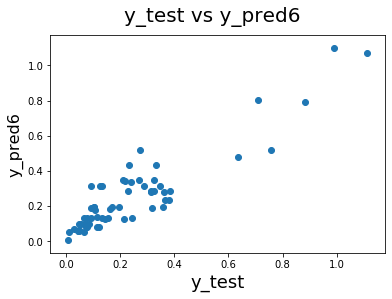

In [76]:
fig = plt.figure()
plt.scatter(y_test,y_pred6)
fig.suptitle('y_test vs y_pred6', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred6', fontsize=16) 

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred6)

0.8224677568849199

#### Evaluating Model 11

In [100]:
X_test_new11 = X_test[X_train_new11.columns]
y_pred11 = lm11.predict(sm.add_constant(X_test_new11))

Text(0, 0.5, 'y_pred11')

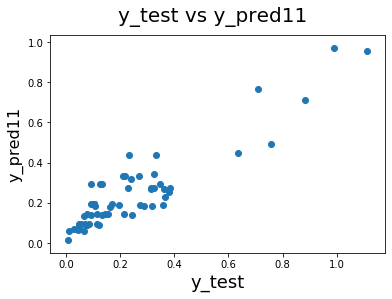

In [103]:
fig = plt.figure()
plt.scatter(y_test,y_pred11)
fig.suptitle('y_test vs y_pred11', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred11', fontsize=16) 

In [104]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred11)

0.8264850179640639

#### So we can see that Model lm11 is the best performing model, based on R-squared score.

### Brief explanation of the important variables

The most import feature for the price prediction is 'enginesize'.